## Análise e Previsão de Temperaturas em Los Angeles

Este notebook apresenta um projeto de análise de dados meteorológicos históricos da cidade de Los Angeles, com o objetivo principal de prever a **temperatura máxima do dia seguinte**. Eu explorei dados desde 1960 até 2025, realizando etapas cruciais como a limpeza de dados, tratamento de valores ausentes e a criação de novas características (engenharia de features) para aprimorar o modelo preditivo. Através da visualização e de um modelo de regressão linear (Ridge), busquei entender os padrões climáticos e construir uma ferramenta capaz de oferecer previsões de temperatura com base nos dados históricos.
#### Obs: A temperatura é medida em Fahrenheit

In [66]:
import pandas as pd
from sympy.physics.quantum.tensorproduct import combined_tensor_printing


In [67]:
weather = pd.read_csv('data//Los_Angels.csv', index_col="DATE")
weather

,STATION,NAME,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,SNWD,...,WT02,WT03,WT05,WT07,WT08,WT09,WT13,WT16,WT18,WT19
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-28,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-29,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-30,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
weather.loc['2025-01-01':'2025-05-31']

,STATION,NAME,ACSH,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,SNWD,...,WT02,WT03,WT05,WT07,WT08,WT09,WT13,WT16,WT18,WT19
DATE,,,,,,,,,,,,,,,,,,,,,
2025-01-01,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-02,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-04,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-05,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-27,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-28,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-05-29,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
weather.apply(pd.isnull).sum() / weather.shape[0]

STATION    0.000000
NAME       0.000000
ACSH       0.803842
AWND       0.614464
FMTM       0.811543
PGTM       0.814054
PRCP       0.000084
PSUN       0.812840
SNOW       0.617812
SNWD       0.609191
TAVG       0.888591
TMAX       0.000000
TMIN       0.000042
TSUN       0.767850
WDF2       0.609316
WDF5       0.614296
WDFG       0.994936
WDFM       0.805432
WESD       0.999540
WSF2       0.608772
WSF5       0.613250
WSFG       0.994936
WSFM       0.805432
WT01       0.859714
WT02       0.992132
WT03       0.999121
WT05       0.995354
WT07       0.980665
WT08       0.765673
WT09       0.999163
WT13       0.917971
WT16       0.963715
WT18       0.999874
WT19       0.999958
dtype: float64

### The core values according to the documentation are:

- PRCP = Precipitation (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
- SNOW = Snowfall (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
- SNWD = Snow depth (mm or inches as per user preference, inches on Daily Form pdf file)
- TMAX = Maximum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file
- TMIN = Minimum temperature (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on
Daily Form pdf file

In [70]:
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [71]:
core_weather.columns = ['precip', 'neve', 'prof_neve', 'temp_max', 'temp_min']
# precip é a precipitação
# prof_neve é a profundidade da neve
core_weather

,precip,neve,prof_neve,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,53,42.0
1960-01-02,0.0,0.0,0.0,56,38.0
1960-01-03,0.0,0.0,0.0,54,38.0
1960-01-04,0.0,0.0,0.0,60,39.0
1960-01-05,0.0,0.0,0.0,63,41.0
...,...,...,...,...,...
2025-05-28,0.0,NaN,0.0,72,61.0
2025-05-29,0.0,NaN,0.0,74,60.0
2025-05-30,0.0,NaN,0.0,96,59.0


In [72]:
"""Missing Values"""
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip       0.000084
neve         0.617812
prof_neve    0.609191
temp_max     0.000000
temp_min     0.000042
dtype: float64

In [73]:
core_weather['neve'].value_counts()


neve
0.0    9132
Name: count, dtype: int64

In [74]:
core_weather['prof_neve'].value_counts()

prof_neve
0.0    9338
Name: count, dtype: int64

In [75]:
del core_weather['neve']

In [76]:
del core_weather['prof_neve']

In [77]:
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,
2025-01-26,NaN,54,48.0
2025-01-27,NaN,60,NaN


In [78]:
core_weather.loc['2025-01-01':'2025-01-31']

,precip,temp_max,temp_min
DATE,,,
2025-01-01,0.00,66,42.0
2025-01-02,0.00,79,47.0
2025-01-03,0.00,65,47.0
2025-01-04,0.00,63,46.0
2025-01-05,0.00,76,46.0
2025-01-06,0.00,75,50.0
2025-01-07,0.00,71,48.0
2025-01-08,0.00,71,47.0
2025-01-09,0.00,70,45.0


In [79]:
core_weather['precip'].value_counts()

precip
0.00    21656
0.01      220
0.02      133
0.03      105
0.04       83
        ...  
1.66        1
2.57        1
2.29        1
2.93        1
1.48        1
Name: count, Length: 229, dtype: int64

In [80]:
# vou substituir os valores nulos por 0, pois a maioria dos valores dessa coluna são 0

core_weather['precip'] = core_weather['precip'].fillna(0)

In [81]:
core_weather[pd.isnull(core_weather['precip'])]

,precip,temp_max,temp_min
DATE,,,


In [82]:
core_weather[pd.isnull(core_weather['temp_min'])]

,precip,temp_max,temp_min
DATE,,,
2025-01-27,0.0,60,NaN


In [83]:
core_weather = core_weather.ffill()
core_weather[pd.isnull(core_weather['temp_min'])]

,precip,temp_max,temp_min
DATE,,,


In [84]:
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
dtype: float64

In [85]:
""" Verificando os tipos de dados """

core_weather.dtypes

precip      float64
temp_max      int64
temp_min    float64
dtype: object

In [86]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2025-05-23', '2025-05-24', '2025-05-25', '2025-05-26', '2025-05-27',
       '2025-05-28', '2025-05-29', '2025-05-30', '2025-05-31', '2025-06-01'],
      dtype='object', name='DATE', length=23894)

In [87]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2025-05-23', '2025-05-24', '2025-05-25', '2025-05-26',
               '2025-05-27', '2025-05-28', '2025-05-29', '2025-05-30',
               '2025-05-31', '2025-06-01'],
              dtype='datetime64[ns]', name='DATE', length=23894, freq=None)

In [88]:
var = core_weather.index.year
var2 = core_weather.index.month
print(var, var2)

Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=23894) Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6],
      dtype='int32', name='DATE', length=23894)


In [89]:
# Obs da documentação: Note: 9’s in a field (e.g.9999) indicate missing data or data that has not been received.

core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

### Analise dos dados

In [90]:
print("Estatísticas Descritivas:")
display(core_weather.describe())

Estatísticas Descritivas:


,precip,temp_max,temp_min
count,23894.000000,23894.000000,23894.000000
mean,0.040080,75.228593,56.959195
std,0.218581,9.388483,7.383610
min,0.000000,46.000000,30.000000
25%,0.000000,68.000000,52.000000
50%,0.000000,75.000000,57.000000
75%,0.000000,82.000000,63.000000
max,5.550000,113.000000,82.000000


<Axes: title={'center': 'Temperaturas Máxima e Mínima'}, xlabel='DATE'>

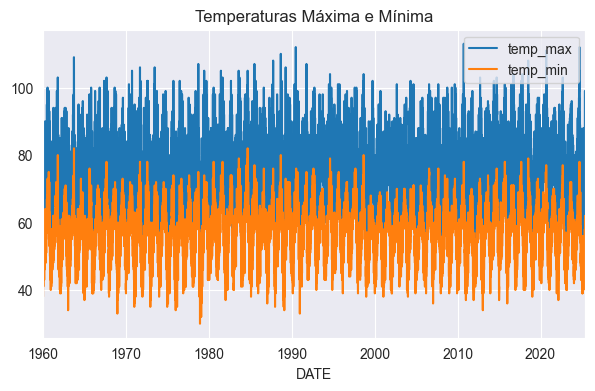

In [91]:
# Temperaturas Máxima e Mínima

core_weather[['temp_max', 'temp_min']].plot(figsize=(7, 4), title='Temperaturas Máxima e Mínima')

<Axes: title={'center': 'Número de Registros por Ano'}, xlabel='DATE'>

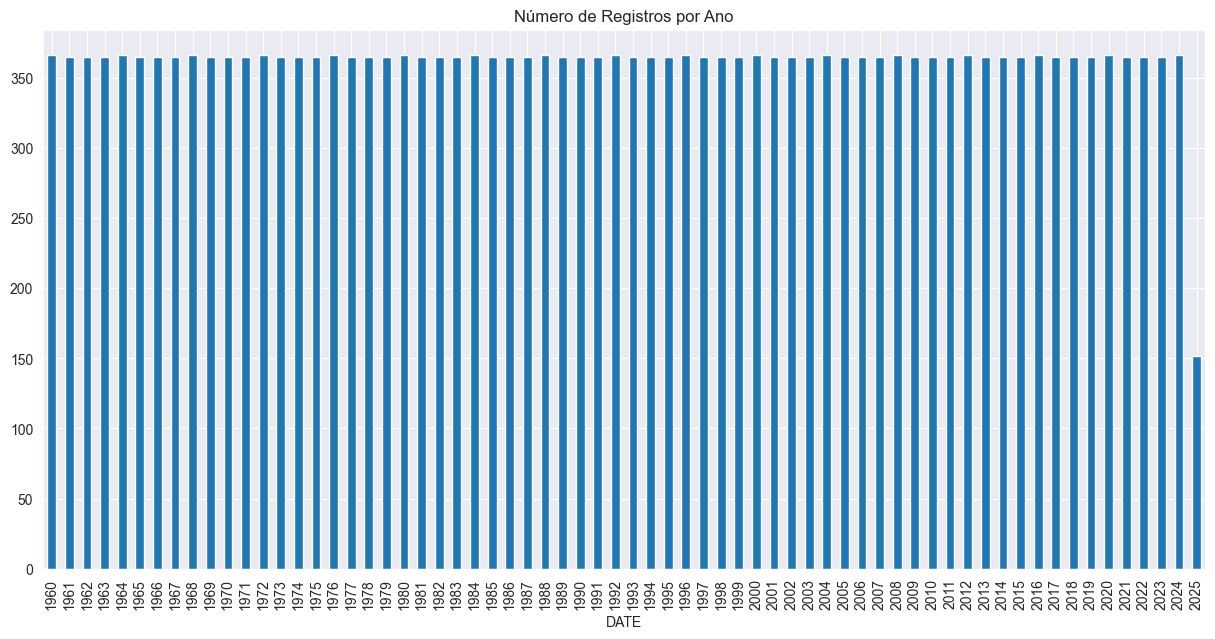

In [92]:
core_weather.index.year.value_counts().sort_index().plot(
    figsize=(15, 7), title='Número de Registros por Ano', kind='bar'
)

# Serve para ver se há anos com menos dados, o que pode indicar problemas de coleta de dados

<Axes: title={'center': 'Precipitação ao Longo do Tempo'}, xlabel='DATE'>

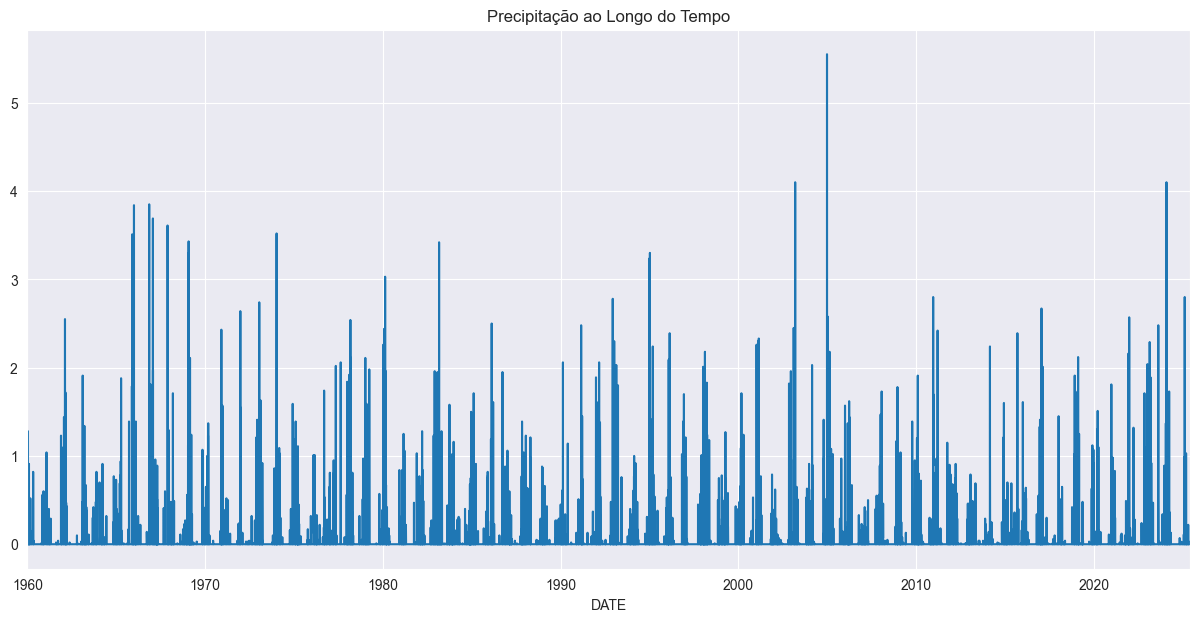

In [93]:
core_weather['precip'].plot(
    figsize=(15, 7), title='Precipitação ao Longo do Tempo', label='Precipitação'
)

In [94]:
core_weather.groupby(core_weather.index.year)['precip'].sum()

DATE
1960     9.57
1961     5.83
1962    15.37
1963    12.31
1964     7.98
        ...  
2021    14.27
2022     7.18
2023    29.44
2024    19.13
2025     7.54
Name: precip, Length: 66, dtype: float64

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

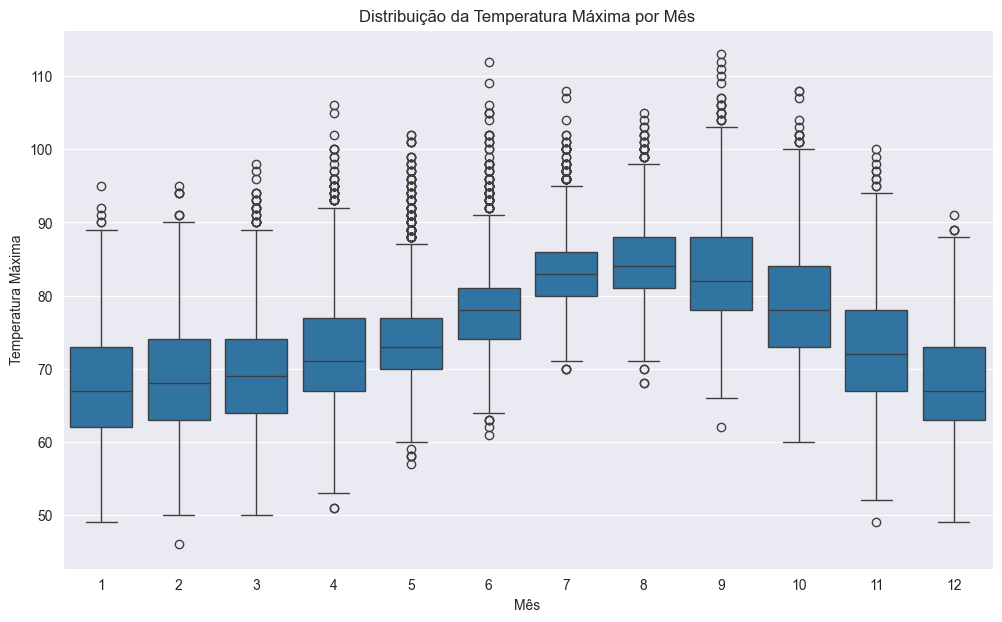

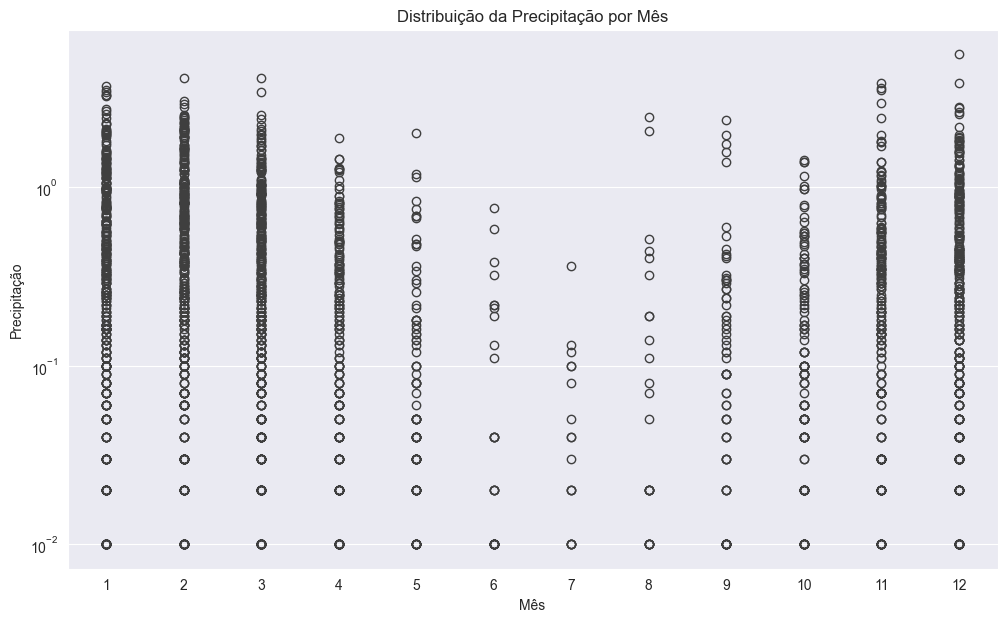

In [96]:
plt.figure(figsize=(12, 7))
sns.boxplot(x=core_weather.index.month, y='temp_max', data=core_weather)
plt.title('Distribuição da Temperatura Máxima por Mês')
plt.xlabel('Mês')
plt.ylabel('Temperatura Máxima')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(x=core_weather.index.month, y='precip', data=core_weather)
plt.title('Distribuição da Precipitação por Mês')
plt.xlabel('Mês')
plt.ylabel('Precipitação')
plt.yscale('log') # Escala logarítmica para precipitação pode ser útil
plt.show()

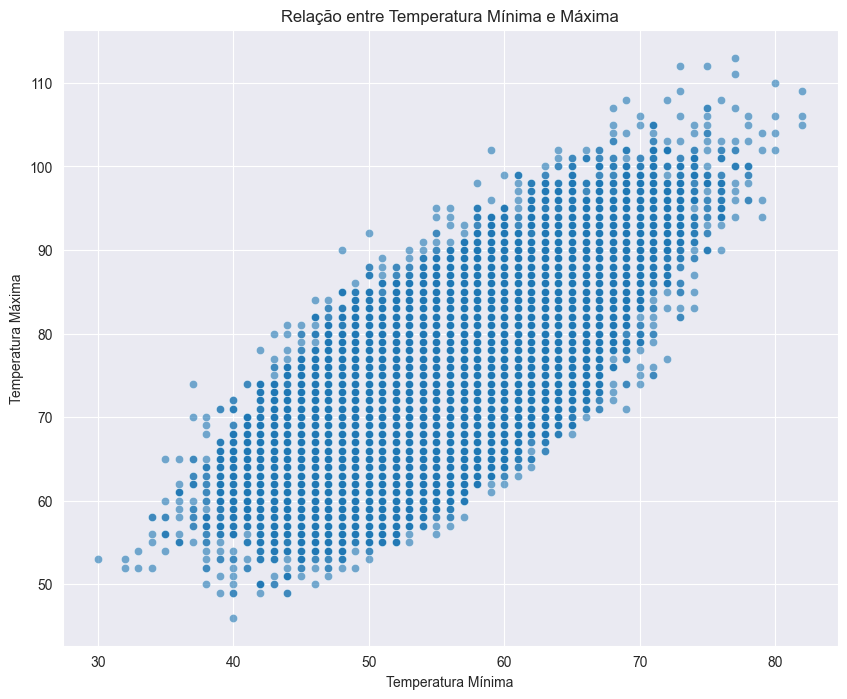

In [97]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='temp_min', y='temp_max', data=core_weather, alpha=0.6)
plt.title('Relação entre Temperatura Mínima e Máxima')
plt.xlabel('Temperatura Mínima')
plt.ylabel('Temperatura Máxima')
plt.show()

### Treinando o modelo

In [129]:
core_weather['target'] = core_weather.shift(-1)['temp_max']
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,daily_avg,day_of_year_avg
DATE,,,,,,,,,,
1960-01-31,0.00,64,49.0,58.0,62.80,0.981250,1.306122,64.000000,64.000000,64.000000
1960-02-01,0.91,58,53.0,67.0,62.87,1.083966,1.094340,58.000000,58.000000,58.000000
1960-02-02,0.00,67,52.0,59.0,63.30,0.944776,1.288462,62.500000,67.000000,67.000000
1960-02-03,0.00,59,50.0,66.0,63.27,1.072373,1.180000,61.333333,59.000000,59.000000
1960-02-04,0.00,66,48.0,67.0,63.37,0.960152,1.375000,62.500000,66.000000,66.000000
...,...,...,...,...,...,...,...,...,...,...
2025-05-27,0.00,73,58.0,72.0,75.00,1.027397,1.258621,74.077375,75.322704,73.757576
2025-05-28,0.00,72,61.0,74.0,75.13,1.043472,1.180328,74.076358,75.224490,75.212121
2025-05-29,0.00,74,60.0,96.0,75.17,1.015811,1.233333,74.076321,75.730612,75.454545


In [130]:
# Removendo a última linha, pois ela não tem valor de target
core_weather = core_weather.iloc[:-1, :].copy()
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,daily_avg,day_of_year_avg
DATE,,,,,,,,,,
1960-01-31,0.00,64,49.0,58.0,62.80,0.981250,1.306122,64.000000,64.000000,64.000000
1960-02-01,0.91,58,53.0,67.0,62.87,1.083966,1.094340,58.000000,58.000000,58.000000
1960-02-02,0.00,67,52.0,59.0,63.30,0.944776,1.288462,62.500000,67.000000,67.000000
1960-02-03,0.00,59,50.0,66.0,63.27,1.072373,1.180000,61.333333,59.000000,59.000000
1960-02-04,0.00,66,48.0,67.0,63.37,0.960152,1.375000,62.500000,66.000000,66.000000
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.00,73,57.0,73.0,74.67,1.022877,1.280702,74.077903,75.313776,72.560606
2025-05-27,0.00,73,58.0,72.0,75.00,1.027397,1.258621,74.077375,75.322704,73.757576
2025-05-28,0.00,72,61.0,74.0,75.13,1.043472,1.180328,74.076358,75.224490,75.212121


In [131]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)

In [132]:
predictors = ['precip', 'temp_min', 'temp_max']

In [133]:
train = core_weather.loc[:'2023-12-31']
test = core_weather.loc['2024-01-01':]

In [134]:
reg.fit(train[predictors], train['target'])

,alpha,0.1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [135]:
predictions = reg.predict(test[predictors])

In [136]:
from sklearn.metrics import mean_absolute_error

In [137]:
mean_absolute_error(test['target'], predictions)

3.585932624760193

In [138]:
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index, name='predictions')], axis=1)
combined

,target,predictions
DATE,,
2024-01-01,68.0,68.002313
2024-01-02,65.0,68.190438
2024-01-03,66.0,66.441313
2024-01-04,66.0,67.221509
2024-01-05,65.0,66.865901
...,...,...
2025-05-26,73.0,73.516888
2025-05-27,72.0,73.635424
2025-05-28,74.0,73.210227


<Axes: xlabel='DATE'>

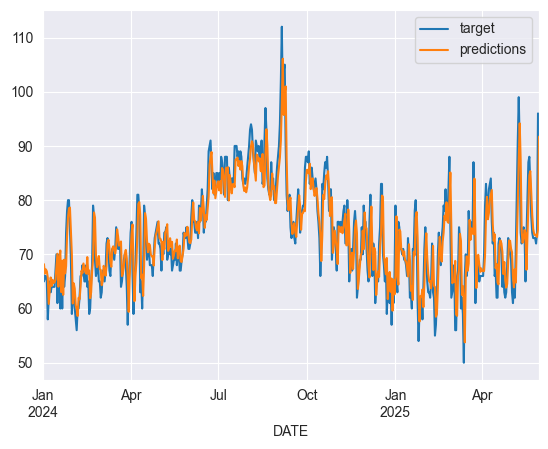

In [139]:
combined.plot()

In [140]:
reg.coef_

array([-0.53603426,  0.11853586,  0.78080398])

### Criando uma função para prever a temperatura

In [141]:
def create_prediction(predictors, core_weather, reg):
    train = core_weather.loc[:'2023-12-31']
    test = core_weather.loc['2024-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions, index=test.index, name='predictions')], axis=1)
    return error, combined

In [142]:
""" Adicionando os rolling means """

core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean().round(2)
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,daily_avg,day_of_year_avg
DATE,,,,,,,,,,
1960-01-31,0.00,64,49.0,58.0,NaN,0.981250,1.306122,64.000000,64.000000,64.000000
1960-02-01,0.91,58,53.0,67.0,NaN,1.083966,1.094340,58.000000,58.000000,58.000000
1960-02-02,0.00,67,52.0,59.0,NaN,0.944776,1.288462,62.500000,67.000000,67.000000
1960-02-03,0.00,59,50.0,66.0,NaN,1.072373,1.180000,61.333333,59.000000,59.000000
1960-02-04,0.00,66,48.0,67.0,NaN,0.960152,1.375000,62.500000,66.000000,66.000000
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.00,73,57.0,73.0,74.67,1.022877,1.280702,74.077903,75.313776,72.560606
2025-05-27,0.00,73,58.0,72.0,75.00,1.027397,1.258621,74.077375,75.322704,73.757576
2025-05-28,0.00,72,61.0,74.0,75.13,1.043472,1.180328,74.076358,75.224490,75.212121


In [143]:
core_weather['month_day_max'] = core_weather['month_max'] / core_weather['temp_max']
core_weather['max_min'] = core_weather['temp_max'] / core_weather['temp_min']

In [144]:
predictors = ['precip', 'temp_min', 'temp_max', 'month_max', 'month_day_max', 'max_min']

In [145]:
core_weather = core_weather.iloc[30:,:].copy()  # Removendo as primeiras 30 linhas para evitar NaN nos rolling means

In [146]:
error, combined = create_prediction(predictors, core_weather, reg)
error

3.4810358993643624

<Axes: title={'center': 'Temperatura Real vs Prevista'}, xlabel='DATE'>

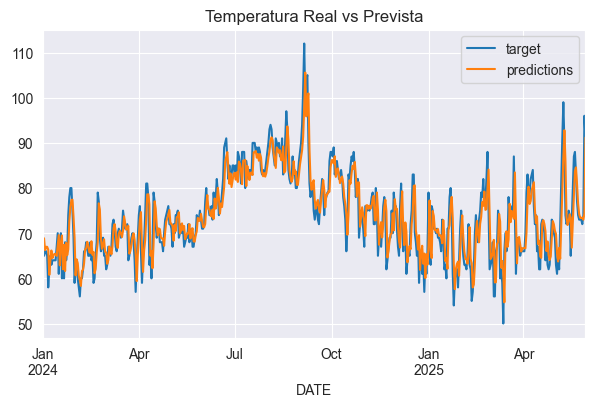

In [147]:
combined.plot(figsize=(7, 4), title='Temperatura Real vs Prevista')

In [148]:
""" Adicionando médias mensais e diárias """

core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).transform(lambda x: x.expanding(1).mean())
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,daily_avg,day_of_year_avg
DATE,,,,,,,,,,
1960-03-01,0.09,63,50.0,64.0,64.67,1.026508,1.260000,63.000000,60.500000,63.000000
1960-03-02,0.00,64,46.0,66.0,64.87,1.013594,1.391304,63.500000,65.500000,64.000000
1960-03-03,0.00,66,49.0,70.0,64.83,0.982273,1.346939,64.333333,62.500000,66.000000
1960-03-04,0.00,70,48.0,72.0,65.20,0.931429,1.458333,65.750000,68.000000,70.000000
1960-03-05,0.00,72,50.0,74.0,65.40,0.908333,1.440000,67.000000,69.500000,72.000000
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.00,73,57.0,73.0,74.67,1.022877,1.280702,74.077903,75.313776,72.560606
2025-05-27,0.00,73,58.0,72.0,75.00,1.027397,1.258621,74.077375,75.322704,73.757576
2025-05-28,0.00,72,61.0,74.0,75.13,1.043472,1.180328,74.076358,75.224490,75.212121


In [149]:
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year).transform(lambda x: x.expanding(1).mean())
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg,daily_avg,day_of_year_avg
DATE,,,,,,,,,,
1960-03-01,0.09,63,50.0,64.0,64.67,1.026508,1.260000,63.000000,60.500000,63.000000
1960-03-02,0.00,64,46.0,66.0,64.87,1.013594,1.391304,63.500000,65.500000,64.000000
1960-03-03,0.00,66,49.0,70.0,64.83,0.982273,1.346939,64.333333,62.500000,66.000000
1960-03-04,0.00,70,48.0,72.0,65.20,0.931429,1.458333,65.750000,68.000000,70.000000
1960-03-05,0.00,72,50.0,74.0,65.40,0.908333,1.440000,67.000000,69.500000,72.000000
...,...,...,...,...,...,...,...,...,...,...
2025-05-26,0.00,73,57.0,73.0,74.67,1.022877,1.280702,74.077903,75.313776,72.560606
2025-05-27,0.00,73,58.0,72.0,75.00,1.027397,1.258621,74.077375,75.322704,73.757576
2025-05-28,0.00,72,61.0,74.0,75.13,1.043472,1.180328,74.076358,75.224490,75.212121


In [150]:
predictors = ['precip', 'temp_min', 'temp_max', 'month_max', 'month_day_max', 'max_min', 'monthly_avg', 'day_of_year_avg']

In [151]:
error, combined = create_prediction(predictors, core_weather, reg)
error

3.4252692548000696

### Diagnóstico do modelo

In [128]:
reg.coef_

array([-0.2567026 ,  0.17163484,  0.74500937, -0.12498819, 11.60401272,
        9.16341475,  0.17362393,  0.08376546])

In [152]:
core_weather.corr()['target']

precip            -0.234632
temp_max           0.853323
temp_min           0.672006
target             1.000000
month_max          0.635305
month_day_max     -0.534847
max_min            0.185467
monthly_avg        0.637046
daily_avg          0.077625
day_of_year_avg    0.665058
Name: target, dtype: float64

### Análise dos erros e outliers

In [156]:
combined['diff'] = (combined['target'] - combined['predictions']).abs()
combined.sort_values('diff', ascending=False).head(10)

,target,predictions,diff
DATE,,,
2025-05-29,96.0,73.986644,22.013356
2024-09-05,112.0,97.715835,14.284165
2025-03-23,87.0,72.958220,14.041780
2024-04-11,63.0,76.467683,13.467683
2024-11-22,62.0,75.191714,13.191714
2025-03-10,60.0,72.519177,12.519177
2025-03-04,56.0,68.414598,12.414598
2024-10-27,69.0,81.255841,12.255841
2025-01-24,61.0,73.222456,12.222456


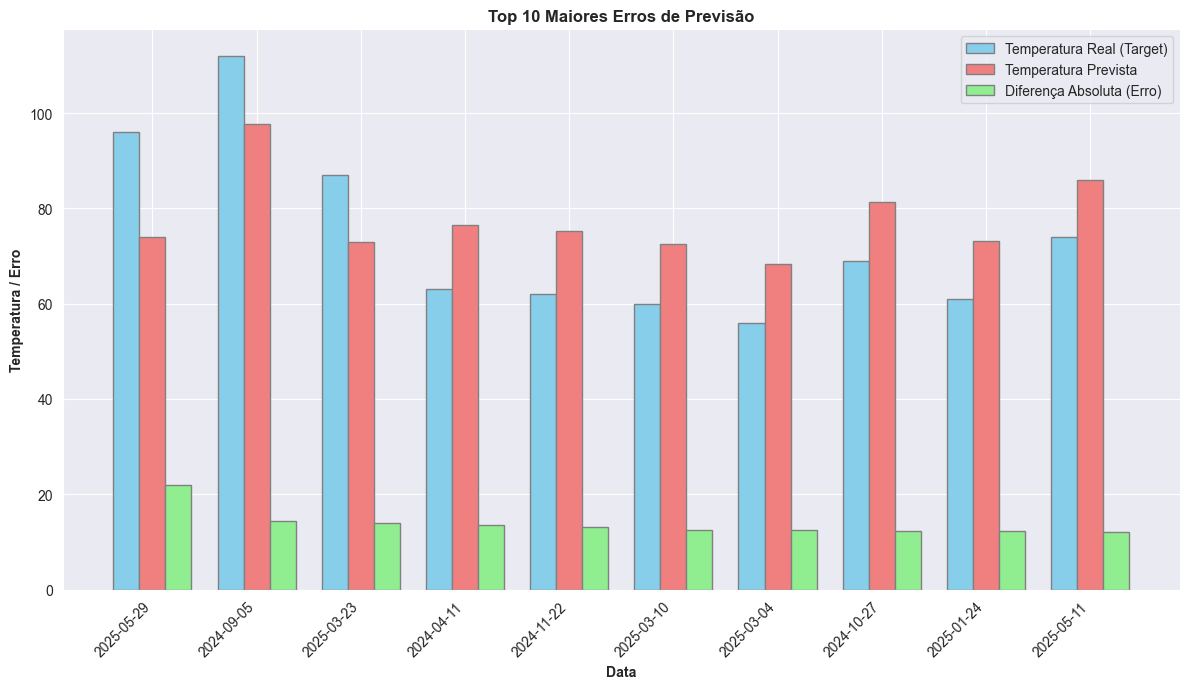

In [162]:
"""Visualizando os maiores erros de previsão"""

combined['diff'] = (combined['target'] - combined['predictions']).abs()
outliers_df = combined.sort_values('diff', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.25
r1 = range(len(outliers_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width * 2 for x in r1]

ax.bar(r1, outliers_df['target'], color='skyblue', width=bar_width, edgecolor='grey', label='Temperatura Real (Target)')
ax.bar(r2, outliers_df['predictions'], color='lightcoral', width=bar_width, edgecolor='grey', label='Temperatura Prevista')
ax.bar(r3, outliers_df['diff'], color='lightgreen', width=bar_width, edgecolor='grey', label='Diferença Absoluta (Erro)')

ax.set_xlabel('Data', fontweight='bold')
ax.set_ylabel('Temperatura / Erro', fontweight='bold')
ax.set_title('Top 10 Maiores Erros de Previsão', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(outliers_df))])
ax.set_xticklabels(outliers_df.index.strftime('%Y-%m-%d'), rotation=45, ha='right')

ax.legend()
plt.tight_layout()
plt.show()

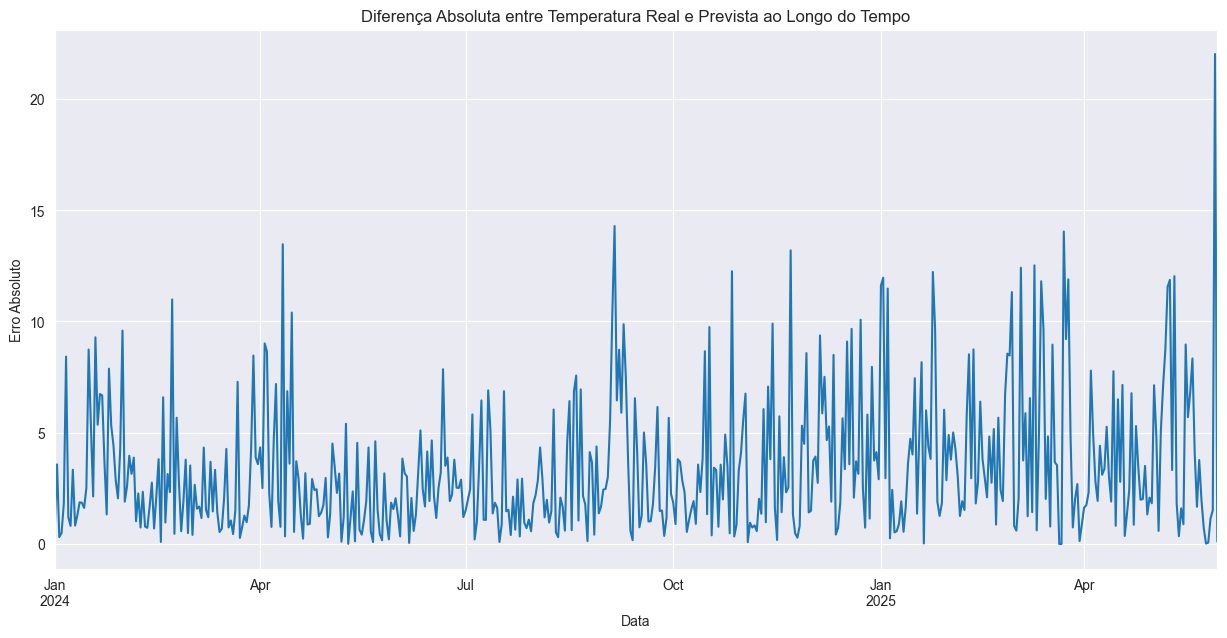

In [157]:
# Visualizando erros ao longo do tempo

plt.figure(figsize=(15, 7))
combined['diff'].plot(title='Diferença Absoluta entre Temperatura Real e Prevista ao Longo do Tempo')
plt.ylabel('Erro Absoluto')
plt.xlabel('Data')
plt.show()

# outliers
# combined.sort_values('diff', ascending=False).head(10)


 Erro médio por mês:


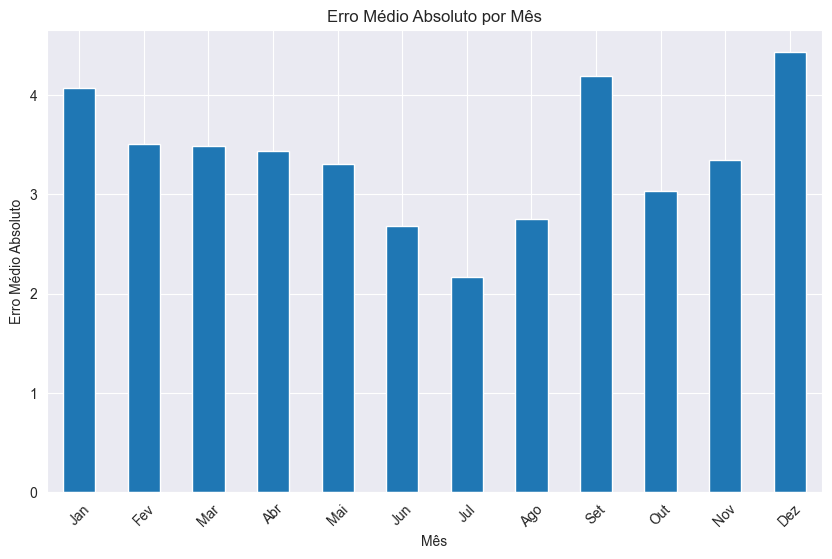

In [161]:
# Analisando o erro médio por mês
print('\n Erro médio por mês:')
error_by_month = combined.groupby(combined.index.month)['diff'].mean()
plt.figure(figsize=(10, 6))
error_by_month.plot(kind='bar', title='Erro Médio Absoluto por Mês')
plt.xlabel('Mês')
plt.ylabel('Erro Médio Absoluto')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=45)
plt.show()


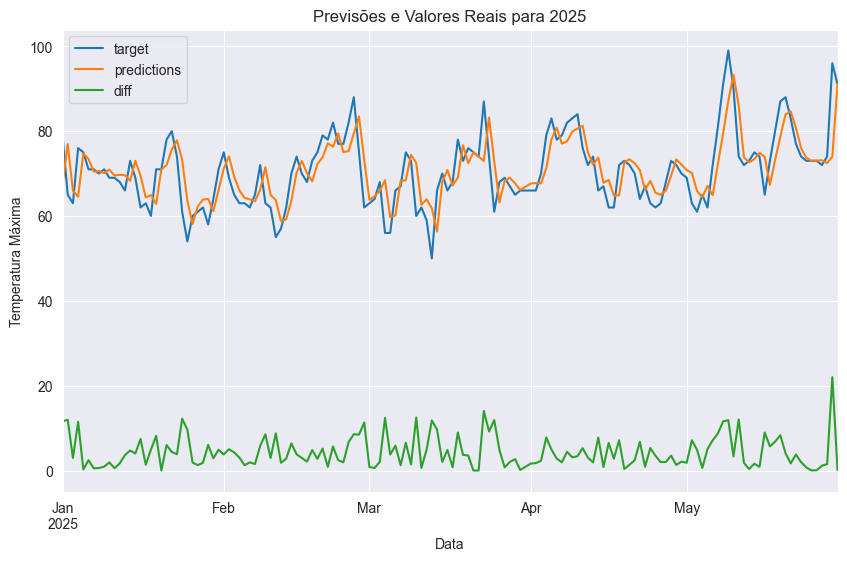

In [159]:
# Visualizando as previsões para o último ano de dados de teste (2025)
combined.loc['2025-01-01':'2025-12-31'].plot(figsize=(10, 6),
                                             title='Previsões e Valores Reais para 2025')
plt.xlabel('Data')
plt.ylabel('Temperatura Máxima')
plt.grid(True)
plt.show()